#### Importação de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Carregar os resultados

In [2]:
cv_A_all = pd.read_csv("results/cv_results_A_all.csv") # Experimento A — todas as features
cv_A_fs  = pd.read_csv("results/cv_results_A_fs.csv")  # Experimento A — feature selection

tt_B_all = pd.read_csv("results/tt_results_B_all.csv") # Experimento B — todas as features
tt_B_fs  = pd.read_csv("results/tt_results_B_fs.csv")  # Experimento B — feature selection

# padronizando colunas
tt_B_all = tt_B_all.rename(columns={
    'Acurácia': 'Acurácia Média',
    'Sensibilidade': 'Sensibilidade Média',
    'Especificidade': 'Especificidade Média',
    'AUC': 'AUC Médio'
})

tt_B_fs = tt_B_fs.rename(columns={
    'Acurácia': 'Acurácia Média',
    'Sensibilidade': 'Sensibilidade Média',
    'Especificidade': 'Especificidade Média',
    'AUC': 'AUC Médio'
})


#### Função para plotar métricas

In [3]:
def plot_metric(df_all, df_fs, metric, experiment_label):

    modelos = df_all['Modelo']
    x = np.arange(len(modelos))
    width = 0.35
    fig, ax = plt.subplots(figsize=(11, 5))

    bars_all = ax.bar(x - width/2, df_all[metric], width,
                      label='Todas as Features', color='#1f77b4')
    bars_fs  = ax.bar(x + width/2, df_fs[metric], width,
                      label='Feature Selection', color='#ff7f0e')

    ax.set_ylabel(metric)
    ax.set_title(f"{experiment_label}")
    ax.set_xticks(x)
    ax.set_xticklabels(modelos)
    ax.legend()

    plt.ylim(0, 1.10)
    ax.bar_label(bars_all, fmt='{:.1%}', padding=3)
    ax.bar_label(bars_fs, fmt='{:.1%}', padding=3)

    plt.tight_layout()
    plt.show()

#### Experimento A (Baseline): Validação Cruzada 10-Fold

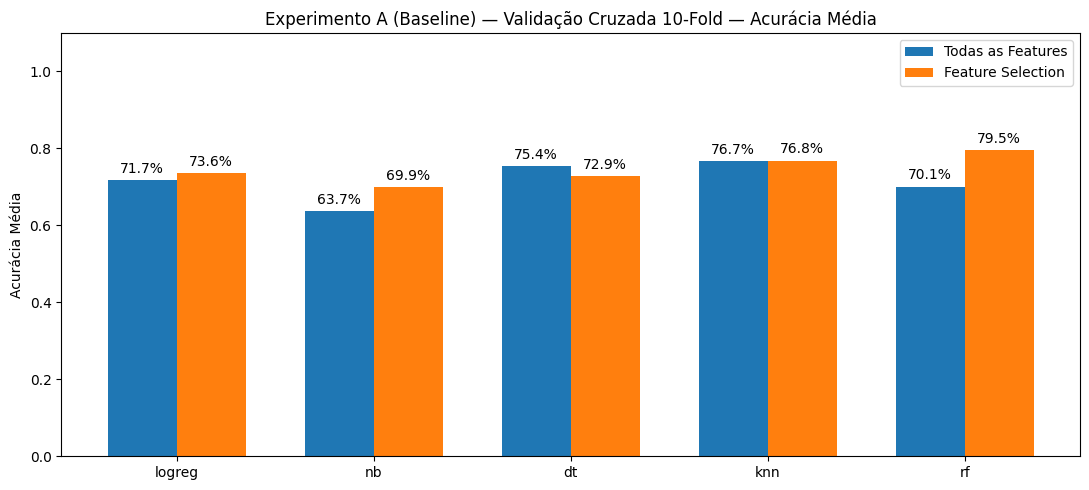

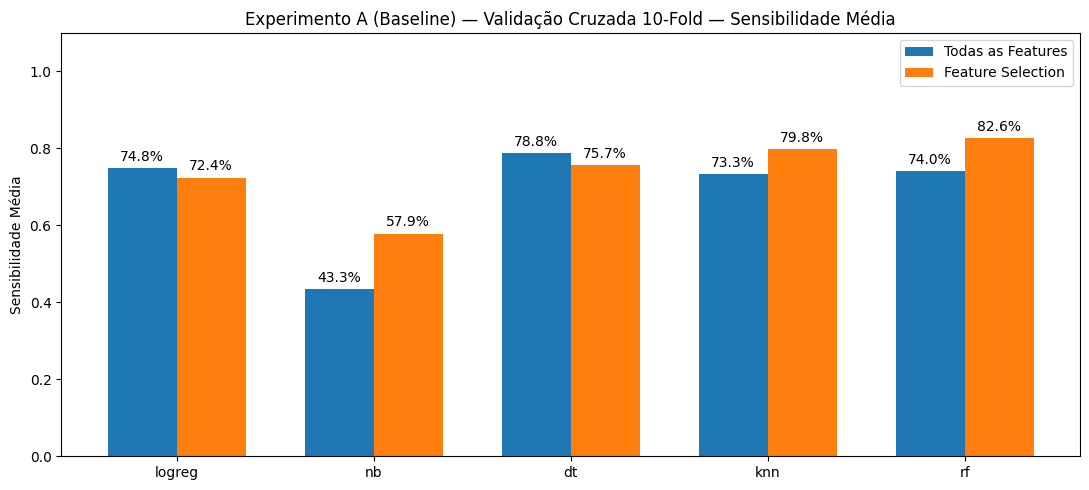

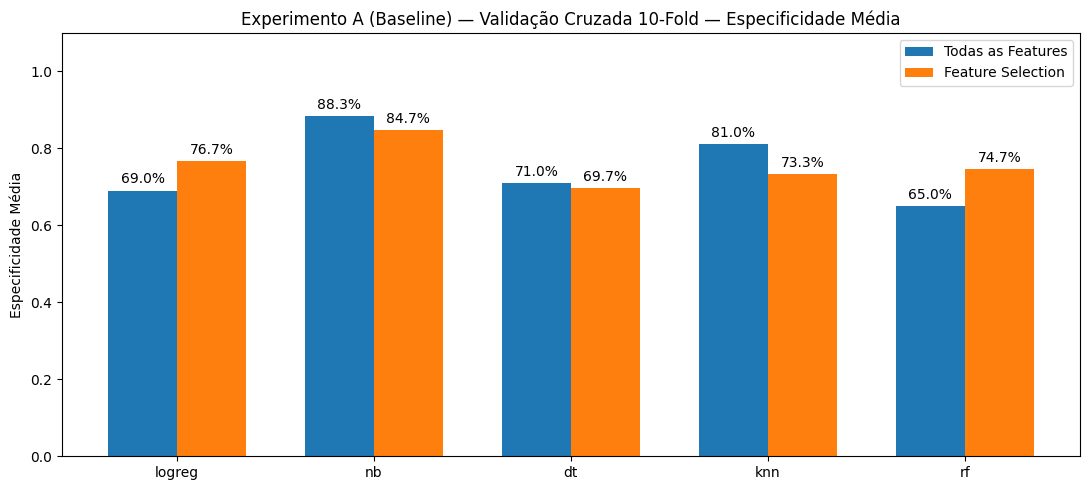

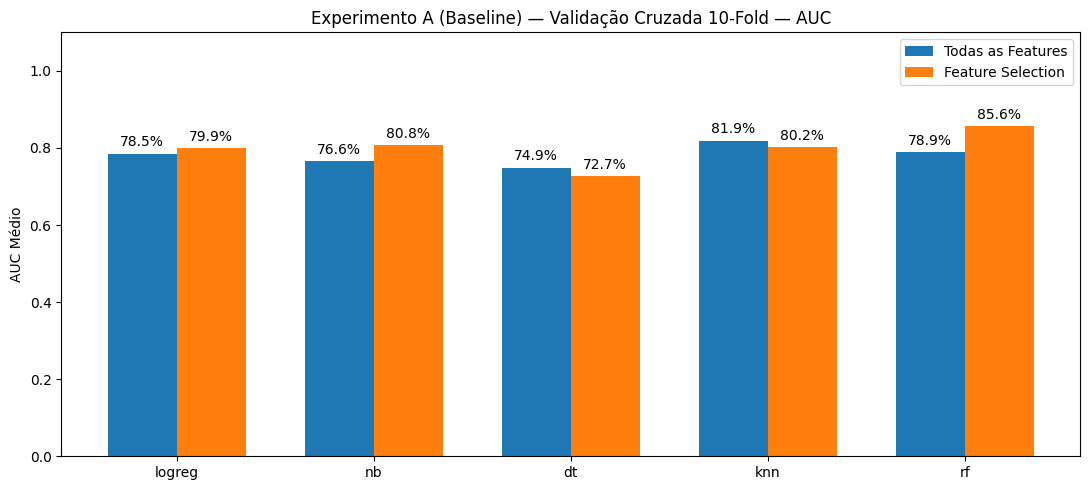

In [4]:
metrics = [
    ('Acurácia Média', 'Acurácia Média'),
    ('Sensibilidade Média', 'Sensibilidade Média'),
    ('Especificidade Média', 'Especificidade Média'),
    ('AUC Médio', 'AUC')
]

for col, label in metrics:
    plot_metric(
        cv_A_all, cv_A_fs,
        col,
        f'Experimento A (Baseline) — Validação Cruzada 10-Fold — {label}'
    )

#### Experimento B: Treino/Teste 80/20

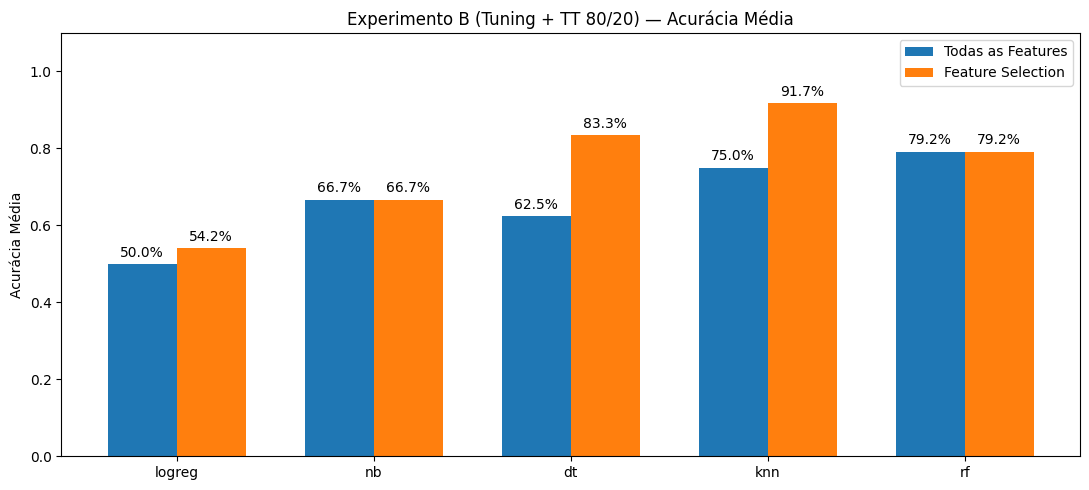

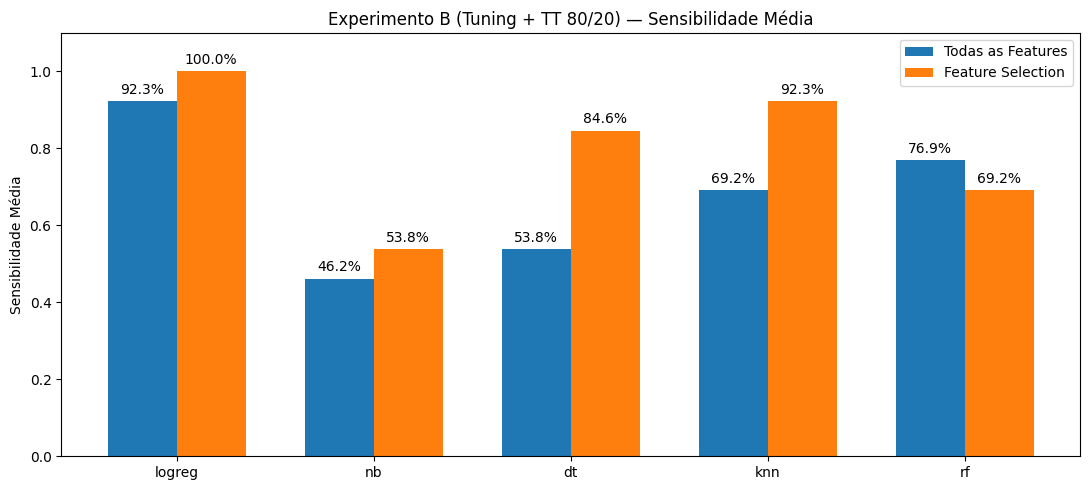

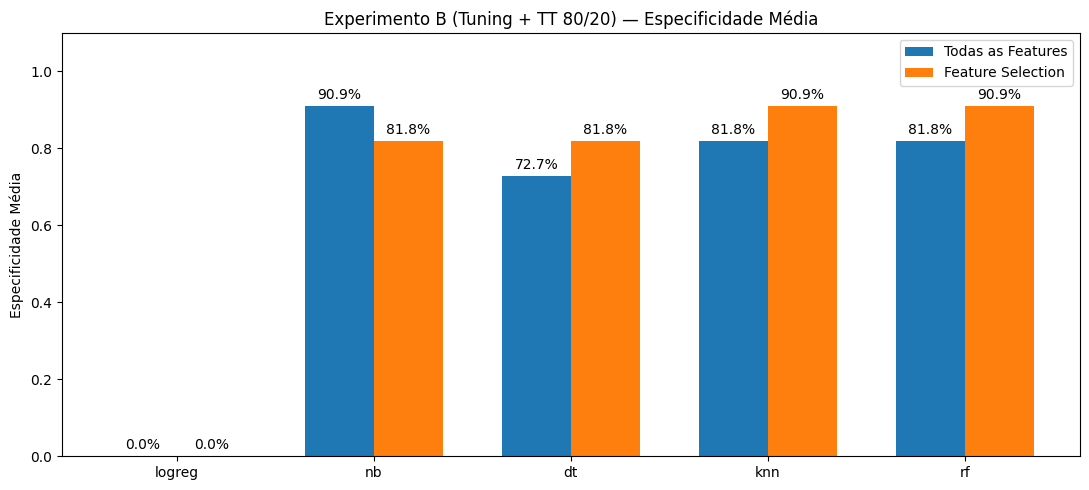

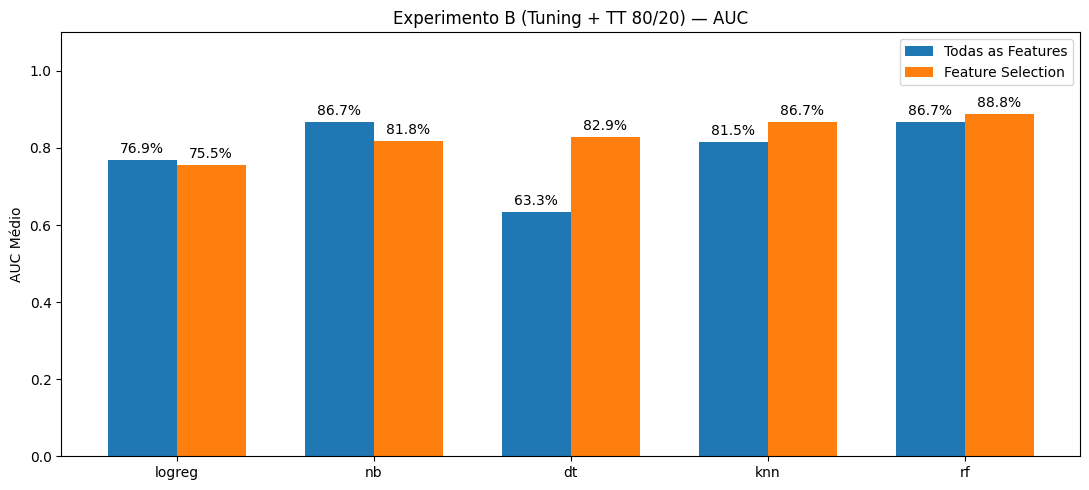

In [5]:
plot_metric(tt_B_all, tt_B_fs, 'Acurácia Média',
            'Experimento B (Tuning + TT 80/20) — Acurácia Média')

plot_metric(tt_B_all, tt_B_fs, 'Sensibilidade Média',
            'Experimento B (Tuning + TT 80/20) — Sensibilidade Média')

plot_metric(tt_B_all, tt_B_fs, 'Especificidade Média',
            'Experimento B (Tuning + TT 80/20) — Especificidade Média')

plot_metric(tt_B_all, tt_B_fs, 'AUC Médio',
            'Experimento B (Tuning + TT 80/20) — AUC')

#### Experimento A

<Figure size 1200x600 with 0 Axes>

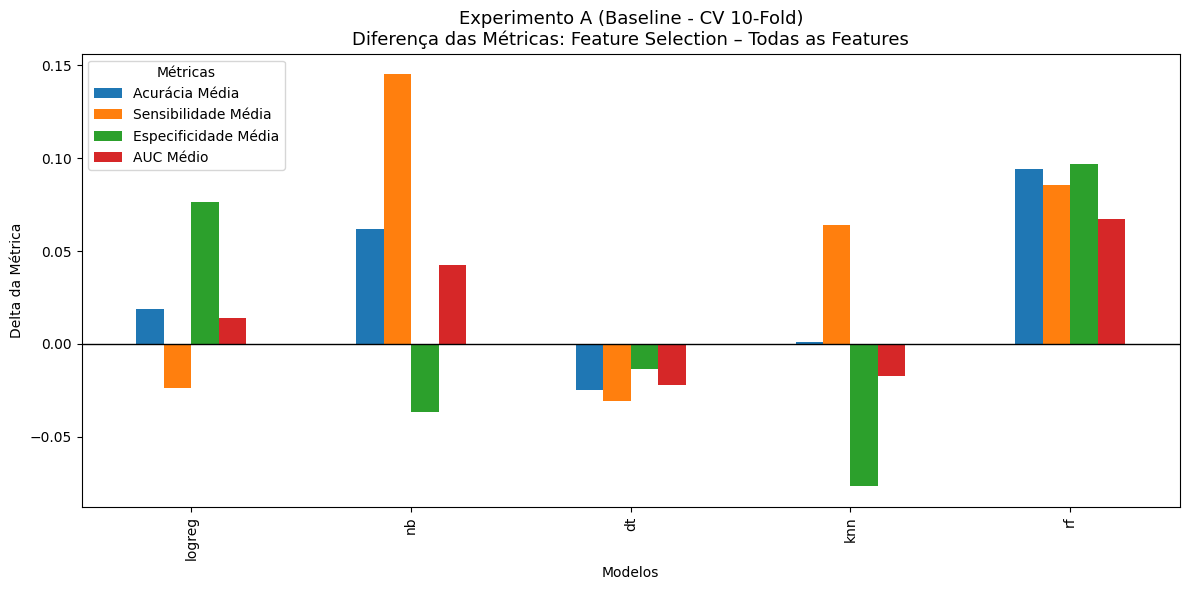

In [6]:
# Calcula o delta (fs - all)
delta_A = cv_A_fs.set_index('Modelo') - cv_A_all.set_index('Modelo')

delta_A = delta_A[['Acurácia Média', 'Sensibilidade Média', 'Especificidade Média', 'AUC Médio']]

plt.figure(figsize=(12, 6))
delta_A.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.axhline(0, color='black', linewidth=1)

plt.title('Experimento A (Baseline - CV 10-Fold)\nDiferença das Métricas: Feature Selection – Todas as Features', fontsize=13)
plt.ylabel('Delta da Métrica')
plt.xlabel('Modelos')

plt.legend(title='Métricas')
plt.tight_layout()
plt.show()


#### Experimento B

<Figure size 1200x600 with 0 Axes>

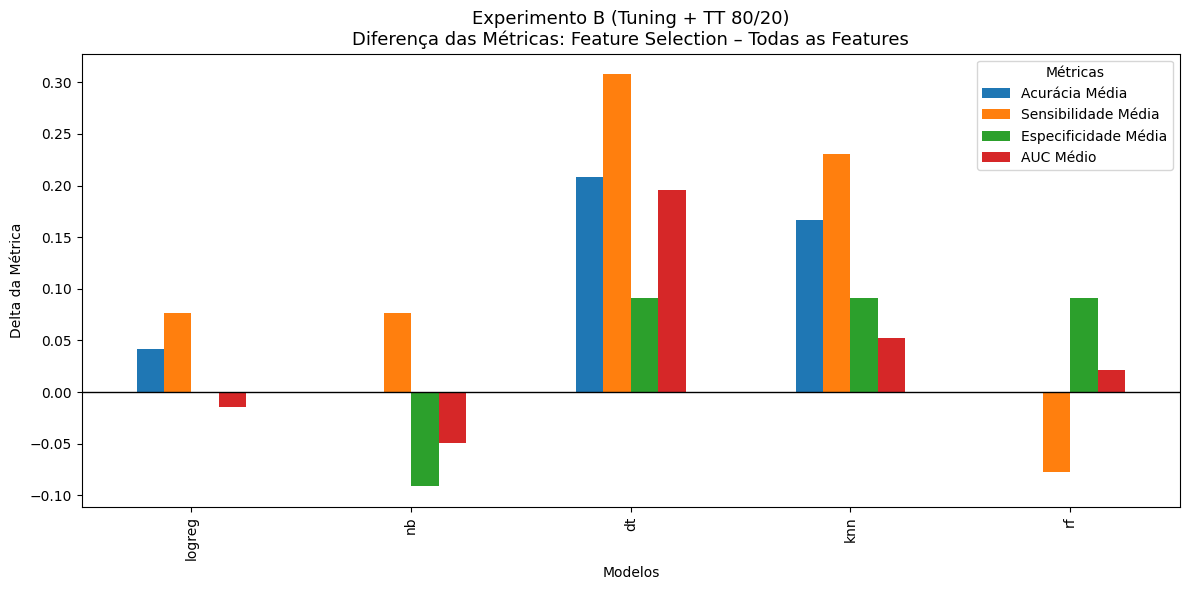

In [7]:
numeric_cols = ['Acurácia Média', 'Sensibilidade Média', 'Especificidade Média', 'AUC Médio']

tt_all_num = tt_B_all[numeric_cols].astype(float)
tt_fs_num  = tt_B_fs[numeric_cols].astype(float)

tt_all_num.index = tt_B_all['Modelo']
tt_fs_num.index  = tt_B_fs['Modelo']

delta_B = tt_fs_num - tt_all_num

plt.figure(figsize=(12, 6))
delta_B.plot(kind='bar',
             figsize=(12, 6),
             color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

plt.axhline(0, color='black', linewidth=1)

plt.title(
    'Experimento B (Tuning + TT 80/20)\nDiferença das Métricas: Feature Selection – Todas as Features',
    fontsize=13
)
plt.ylabel('Delta da Métrica')
plt.xlabel('Modelos')

plt.legend(title='Métricas')
plt.tight_layout()
plt.show()


#### Comparação dos dois experimentos

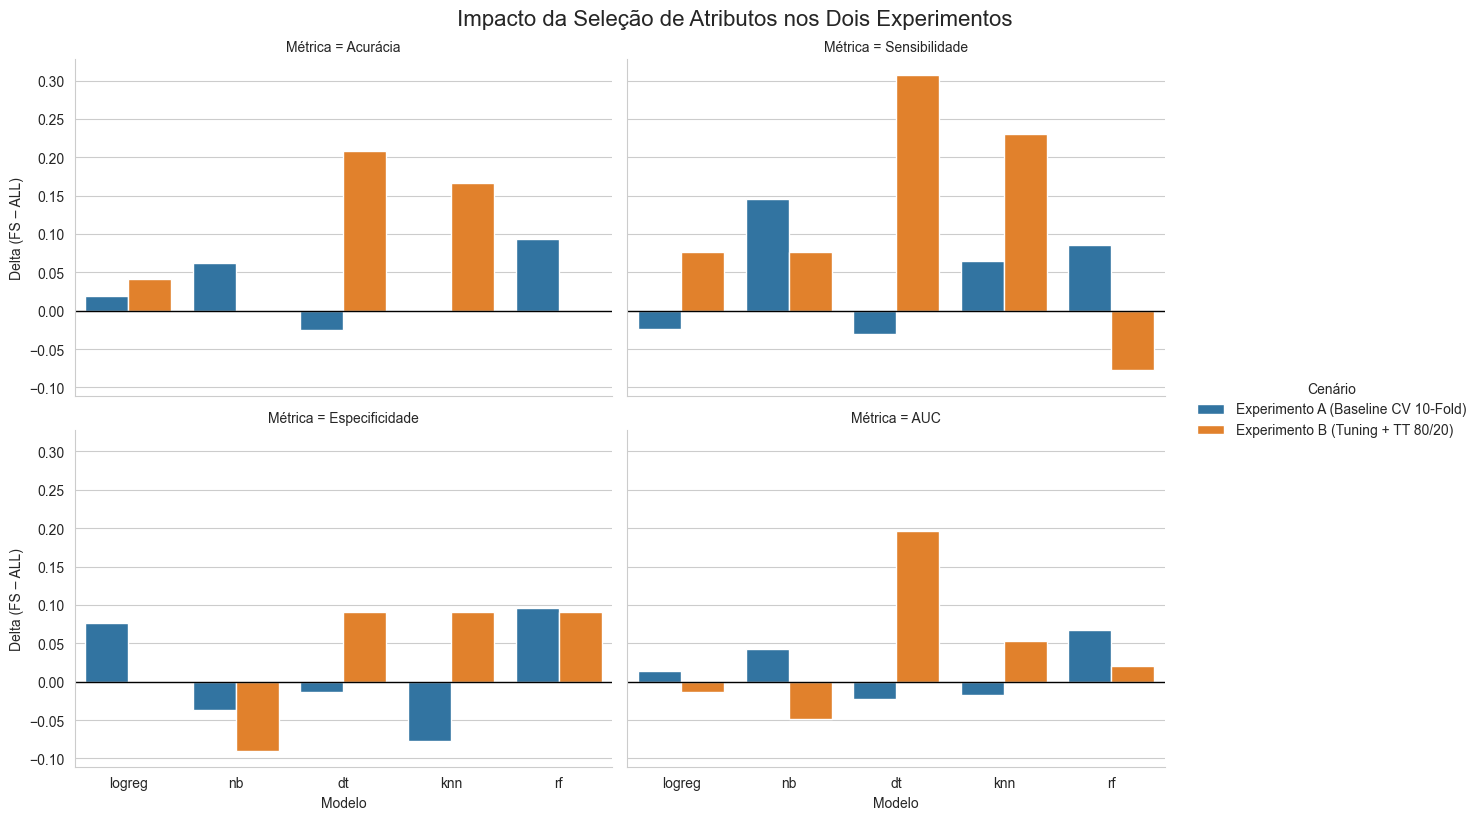

In [8]:
metrics_map = {
    'Acurácia': 'Acurácia Média',
    'Sensibilidade': 'Sensibilidade Média',
    'Especificidade': 'Especificidade Média',
    'AUC': 'AUC Médio'
}

data_list = []
models = cv_A_all['Modelo'].unique()

for model in models:
    row_cv_all = cv_A_all[cv_A_all['Modelo'] == model].iloc[0]
    row_cv_fs  = cv_A_fs[cv_A_fs['Modelo'] == model].iloc[0]
    row_tt_all = tt_B_all[tt_B_all['Modelo'] == model].iloc[0]
    row_tt_fs  = tt_B_fs[tt_B_fs['Modelo'] == model].iloc[0]

    for metric_name, metric_col in metrics_map.items():
        delta_cv = row_cv_fs[metric_col] - row_cv_all[metric_col]
        delta_tt = row_tt_fs[metric_col] - row_tt_all[metric_col]

        data_list.append({
            'Modelo': model,
            'Métrica': metric_name,
            'Cenário': 'Experimento A (Baseline CV 10-Fold)',
            'Delta': delta_cv
        })
        data_list.append({
            'Modelo': model,
            'Métrica': metric_name,
            'Cenário': 'Experimento B (Tuning + TT 80/20)',
            'Delta': delta_tt
        })

df_plot = pd.DataFrame(data_list)

sns.set_style("whitegrid")

g = sns.catplot(
    data=df_plot,
    x='Modelo',
    y='Delta',
    hue='Cenário',
    col='Métrica',
    col_wrap=2,
    kind='bar',
    height=4,
    aspect=1.5,
    palette=['#1f77b4', '#ff7f0e'] 
)

g.map(plt.axhline, y=0, color='black', linewidth=1)

g.fig.suptitle(
    'Impacto da Seleção de Atributos nos Dois Experimentos',
    y=1.02,
    fontsize=16
)
g.set_axis_labels("Modelo", "Delta (FS – ALL)")
plt.show()
